<a href="https://colab.research.google.com/github/smitha1999/ML-mini-project-/blob/master/ML(miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!ls

drive  sample_data


In [3]:
cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
!mkdir images

In [6]:
cd images

/content/drive/My Drive/images


In [7]:
from bing_image_downloader import downloader
downloader.download("Cat animal",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-WtdFq_e6eKo/TV5W5s-hS-I/AAAAAAAAAvM/gmCUYOx3bX8/s1600/Animals_Cats_Small_cat_005241_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-MzZCzWI_6Xc/UIUQp1qPfzI/AAAAAAAAHpA/OTwHCJSWFAY/s1600/cats_animals_kittens_cat_kitten_cute_desktop_1680x1050_hd-wallpaper-753974.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.nationalgeographic.com/content/dam/animals/thumbs/rights-exempt/mammals/d/domestic-cat_thumb.ngsversion.1472140774957.adapt.1900.1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg/1200px-An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/An_up-close_picture_of_a_curious_

In [8]:
from bing_image_downloader import downloader
downloader.download("Rat animal",limit = 20, output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.spirit-animals.com/wp-content/uploads/2014/02/Rat-Fancy.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-kB9LF7kd6_U/TmRLtKn7oHI/AAAAAAAAA2c/4f9PfPb0yJY/s1600/rat_1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.spirit-animals.com/wp-content/uploads/2014/02/Rat-Brown.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://s7d1.scene7.com/is/image/PETCO/291668-left-1
[%] File Downloaded !

[%] Downloading Image #5 from https://media1.britannica.com/eb-media/69/93369-050-9E02CEE6.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Rattus_norvegicus_-Fairlands_Valley_Park%2C_Stevenage%2C_England-8.jpg/1200px-Rattus_norvegicus_-Fairlands_Valley_Park%2C_Stevenage%2C_England-8.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://62e528761d0685343e1c-f3d1b

In [9]:
downloader.download?

In [10]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [11]:
target = []   
flat_data = []   
images= []

path = '/content/drive/My Drive/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)

(40, 7500)
(40,)
(40, 50, 50, 3)


In [12]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.455518,0.301961,0.160784,0.506634,0.333569,0.184314,0.553333,0.361176,0.200886,0.580941,0.380941,0.215686,0.596078,0.396078,0.223529,0.600000,0.396078,0.223529,0.600000,0.395529,0.220157,0.603922,0.396078,0.223529,0.603922,0.396078,0.227451,0.603922,0.409333,0.252471,0.603922,0.440863,0.309804,0.498667,0.363216,0.263355,0.174510,0.125490,0.102510,0.264863,...,0.951843,0.567843,0.506510,0.909412,0.497098,0.429882,0.822431,0.414907,0.347922,0.572941,0.270380,0.218850,0.320676,0.103294,0.032157,0.306431,0.078980,0.000000,0.336378,0.090602,0.000000,0.357412,0.105882,0.003922,0.372549,0.113725,0.003922,0.376471,0.113725,0.003922,0.376471,0.117647,0.003922,0.376471,0.117647,0.003922,0.376471,0.117647,0.003922,Cat animal
1,0.852941,0.847059,0.862745,0.858824,0.850980,0.862745,0.858824,0.850980,0.858824,0.853922,0.847059,0.854902,0.847059,0.839216,0.847059,0.847059,0.839216,0.847059,0.847059,0.839216,0.847059,0.841176,0.831373,0.835294,0.847059,0.837255,0.844118,0.854902,0.847059,0.854902,0.866667,0.858824,0.858824,0.875490,0.866667,0.862745,0.874510,0.866667,0.862745,0.864706,...,0.980392,0.980392,0.988235,0.980392,0.980392,0.988235,0.976471,0.976471,0.984314,0.972549,0.972549,0.984314,0.968627,0.967647,0.980392,0.964706,0.960784,0.976471,0.964706,0.960784,0.976471,0.960784,0.956863,0.972549,0.956863,0.952941,0.968627,0.952941,0.949020,0.968627,0.949020,0.948039,0.964706,0.945098,0.941176,0.960784,0.941176,0.937255,0.952941,Cat animal
2,0.204902,0.000000,0.035294,0.271569,0.000000,0.047059,0.346078,0.007843,0.073529,0.393137,0.020588,0.098039,0.400000,0.031373,0.105882,0.372549,0.023529,0.091176,0.329412,0.015686,0.070588,0.298039,0.003922,0.051961,0.266667,0.000000,0.039216,0.207843,0.003922,0.027451,0.131373,0.011765,0.019608,0.051961,0.007843,0.007843,0.011765,0.003922,0.000000,0.000000,...,0.452941,0.455882,0.455882,0.523529,0.531373,0.533333,0.576471,0.584314,0.588235,0.611765,0.619608,0.625490,0.623529,0.635294,0.643137,0.627451,0.642157,0.650980,0.631373,0.643137,0.654902,0.620588,0.639216,0.650980,0.611765,0.631373,0.643137,0.611765,0.627451,0.639216,0.615686,0.631373,0.643137,0.607843,0.625490,0.637255,0.576471,0.597059,0.609804,Cat animal
3,0.066483,0.084549,0.019608,0.073647,0.105725,0.015686,0.062745,0.074510,0.007843,0.074510,0.089617,0.008422,0.078431,0.109564,0.011765,0.070588,0.113725,0.007843,0.074510,0.114431,0.011765,0.058502,0.090510,0.007843,0.024235,0.033429,0.003922,0.023529,0.007843,0.003922,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.013373,0.003922,0.000000,0.030602,...,0.352941,0.192157,0.117647,0.345098,0.200000,0.124784,0.349020,0.197558,0.121569,0.363807,0.235059,0.152706,0.403922,0.333333,0.239216,0.411765,0.267059,0.179757,0.392157,0.231373,0.149020,0.418452,0.241981,0.149020,0.431373,0.247059,0.156863,0.447059,0.243137,0.156863,0.431373,0.260000,0.168133,0.397492,0.257178,0.165569,0.440235,0.195242,0.105882,Cat animal
4,0.870588,0.862745,0.874510,0.874510,0.866667,0.878431,0.874510,0.870588,0.878431,0.878431,0.870588,0.882353,0.882353,0.874510,0.886275,0.882353,0.874510,0.890196,0.886275,0.878431,0.894118,0.886275,0.878431,0.898039,0.890196,0.882353,0.898039,0.898039,0.882353,0.901961,0.898039,0.886275,0.898039,0.898039,0.886275,0.898039,0.901961,0.890196,0.901961,0.901961,...,0.976471,0.968627,0.980392,0.980392,0.972549,0.988235,0.980392,0.972549,0.990196,0.980392,0.968627,0.988235,0.980392,0.968627,0.988235,0.980392,0.971569,0.992157,0.980392,0.972549,0.992157,0.984314,0.980392,0.992157,0.988235,0.980392,0.996078,0.984314,0.980392,0.996078,0.988235,0.978431,0.996078,0.988235,0.980392,0.996078,0.992157,0.984314,0.996078,Cat animal


In [14]:
x=df.drop(columns=['Target'])
y=df['Target']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30, 7500), (10, 7500), (30,), (10,))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['Rat animal', 'Rat animal', 'Rat animal', 'Cat animal',
       'Rat animal', 'Cat animal', 'Cat animal', 'Rat animal',
       'Rat animal', 'Cat animal'], dtype=object)

In [17]:

y_test

9     Cat animal
14    Cat animal
27    Rat animal
33    Rat animal
29    Rat animal
10    Cat animal
11    Cat animal
25    Rat animal
16    Cat animal
0     Cat animal
Name: Target, dtype: object

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.75      0.50      0.60         6
  Rat animal       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



In [19]:
from sklearn.linear_model import LogisticRegression as LR
m=LR()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

array(['Rat animal', 'Rat animal', 'Rat animal', 'Cat animal',
       'Rat animal', 'Cat animal', 'Cat animal', 'Rat animal',
       'Rat animal', 'Cat animal'], dtype=object)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.75      0.50      0.60         6
  Rat animal       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.75      0.50      0.60         6
  Rat animal       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

[[3 3]
 [1 3]]


In [22]:
z = np.arange(1,25)
z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [23]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':z}   
model = KNeighborsClassifier()
model_grid = GridSearchCV(model,param)    
model_grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
model_grid.best_params_

{'n_neighbors': 7}

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['Rat animal', 'Rat animal', 'Cat animal', 'Cat animal',
       'Rat animal', 'Cat animal', 'Cat animal', 'Rat animal',
       'Rat animal', 'Cat animal'], dtype=object)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.60      0.50      0.55         6
  Rat animal       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10

[[3 3]
 [2 2]]


In [28]:
from sklearn.linear_model import LogisticRegression as LR
m=LR(class_weight='balanced')
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['Rat animal', 'Rat animal', 'Rat animal', 'Cat animal',
       'Rat animal', 'Cat animal', 'Cat animal', 'Rat animal',
       'Rat animal', 'Cat animal'], dtype=object)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.75      0.50      0.60         6
  Rat animal       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

[[3 3]
 [1 3]]


In [30]:
from sklearn import svm
mod=svm.SVC()
mod.fit(x_train,y_train)
pred=mod.predict(x_test)

pred

array(['Rat animal', 'Rat animal', 'Rat animal', 'Cat animal',
       'Rat animal', 'Cat animal', 'Cat animal', 'Rat animal',
       'Rat animal', 'Cat animal'], dtype=object)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.75      0.50      0.60         6
  Rat animal       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

[[3 3]
 [1 3]]


In [33]:
from sklearn.ensemble import RandomForestClassifier as RFC
m=RFC()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred_prob=m.predict_proba(x_test)
print(pred)
print(pred_prob)

['Rat animal' 'Rat animal' 'Cat animal' 'Cat animal' 'Rat animal'
 'Cat animal' 'Cat animal' 'Rat animal' 'Rat animal' 'Cat animal']
[[0.36 0.64]
 [0.23 0.77]
 [0.55 0.45]
 [0.73 0.27]
 [0.39 0.61]
 [0.86 0.14]
 [0.77 0.23]
 [0.12 0.88]
 [0.29 0.71]
 [0.85 0.15]]


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.60      0.50      0.55         6
  Rat animal       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10

[[3 3]
 [2 2]]


In [35]:

from sklearn.ensemble import RandomForestClassifier as RFC
m=RFC()
m.fit(x_train,y_train)
pred=m.predict(x_test)
pred_prob=m.predict_proba(x_test)
print(pred)
print(pred_prob)

['Rat animal' 'Rat animal' 'Cat animal' 'Cat animal' 'Rat animal'
 'Cat animal' 'Cat animal' 'Rat animal' 'Rat animal' 'Cat animal']
[[0.27 0.73]
 [0.17 0.83]
 [0.52 0.48]
 [0.67 0.33]
 [0.29 0.71]
 [0.73 0.27]
 [0.78 0.22]
 [0.17 0.83]
 [0.32 0.68]
 [0.84 0.16]]


In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

  Cat animal       0.60      0.50      0.55         6
  Rat animal       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10

[[3 3]
 [2 2]]


In [37]:
import cv2
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

(288, 213, 3)


[array([0.18980627, 0.10016157, 0.10443137, ..., 0.55713725, 0.3625098 ,
        0.35564706])]

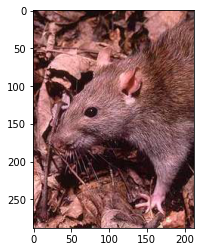

In [42]:
a=imread('https://media4.picsearch.com/is?D_4XEoZLxByT6MHr-ktbu4fynkrf2ntjEQbkRd0mlxk&height=288')
print(a.shape)
plt.imshow(a)
new=[]
imgresized = resize(a,(50,50,3))
new.append(imgresized.flatten())
new

In [43]:
b=np.array(new)

In [44]:
p=model.predict(b)    
p

array(['Rat animal'], dtype=object)